[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Object Detection on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon Dec  2 11:58:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.3/112.6 GB disk)


## Inference with model pre-trained on COCO dataset

### CLI

**NOTE:** CLI requires no customization or Python code. You can simply run all tasks from the terminal with the yolo command.

In [ ]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 5.35M/5.35M [00:00<00:00, 95.9MB/s]
WARNING ⚠️ yolo11n.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.3s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 104k/104k [00:00<00:00, 44.7MB/s]
image 1/1 /content/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 61.4ms
Speed: 11.7ms 

**NOTE:** Result annotated image got saved in `{HOME}/runs/detect/predict/`. Let's display it.

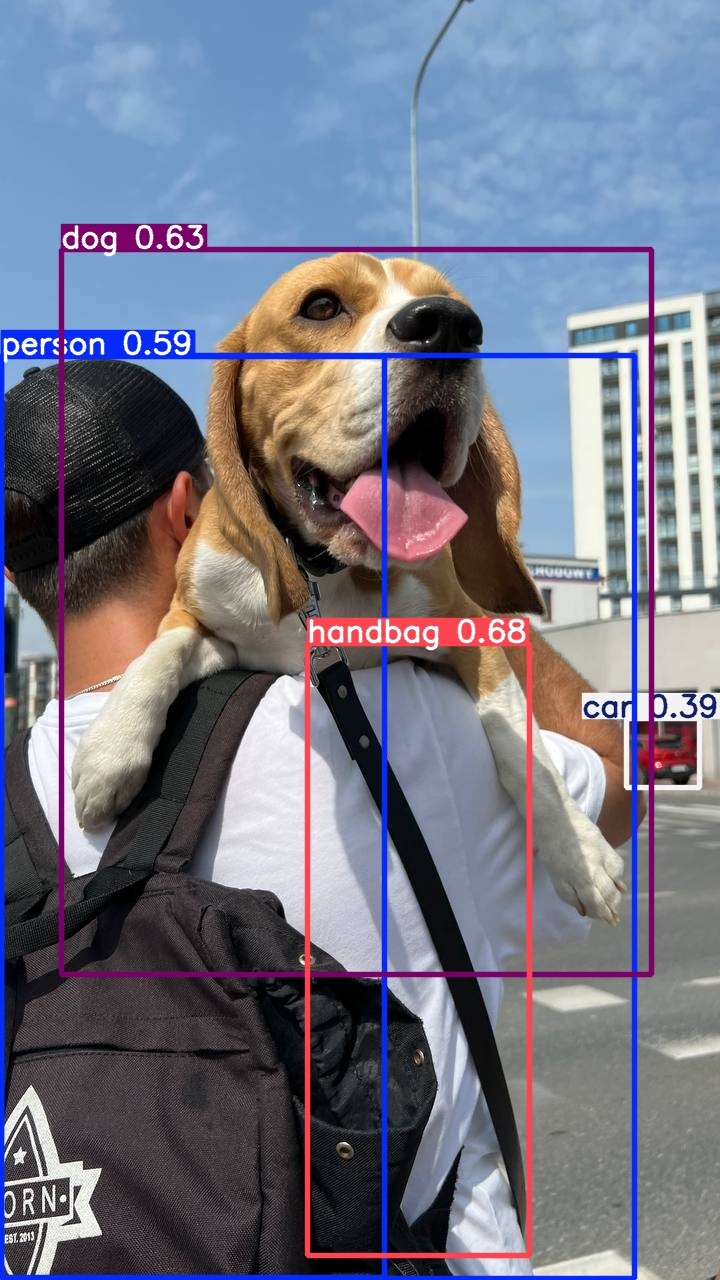

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/predict/dog.jpeg', width=600)

### SDK

**NOTE:** YOLO's Python interface allows for seamless integration into your Python projects, making it easy to load, run, and process the model's output.

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 60.1ms
Speed: 3.9ms preprocess, 60.1ms inference, 924.2ms postprocess per image at shape (1, 3, 640, 384)


**NOTE:** The obtained `result` object stores information about the location, classes, and confidence levels of the detected objects.

In [ ]:
result.boxes.xyxy

tensor([[3.0705e+02, 6.4341e+02, 5.2919e+02, 1.2558e+03],
        [6.1400e+01, 2.4994e+02, 6.5165e+02, 9.7412e+02],
        [1.7803e+00, 3.5551e+02, 6.3404e+02, 1.2788e+03],
        [1.1933e+00, 3.5620e+02, 3.8455e+02, 1.2776e+03],
        [6.2615e+02, 7.1818e+02, 6.9975e+02, 7.8754e+02]], device='cuda:0')

In [ ]:
result.boxes.conf

tensor([0.6832, 0.6284, 0.5941, 0.3923, 0.3875], device='cuda:0')

In [ ]:
result.boxes.cls

tensor([26., 16.,  0.,  0.,  2.], device='cuda:0')

**NOTE:** YOLO11 can be easily integrated with `supervision` using the familiar `from_ultralytics` connector.

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

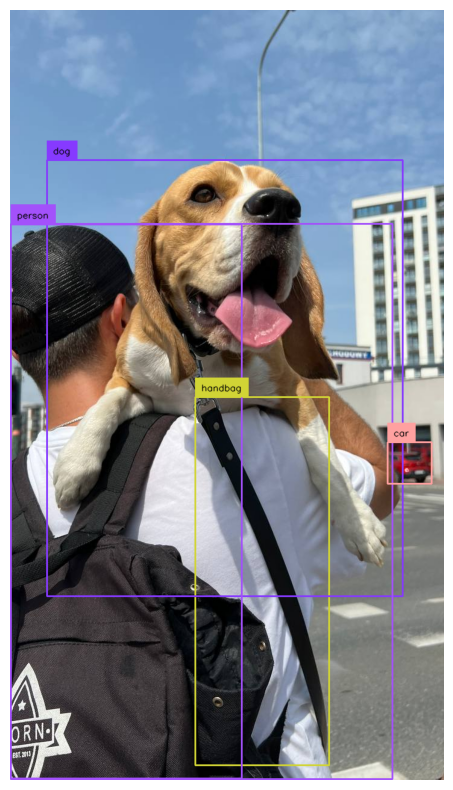

In [ ]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!mkdir /content/drive/MyDrive/datasets
%cd /content/drive/MyDrive
#!mkdir {HOME}/datasets
#%cd {HOME}/datasets




!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="G6PAAydonaSce4QEESUQ")
project = rf.workspace("gasleakage").project("gasleakage-izgbu")
version = project.version(6)
dataset = version.download("yolov11")


/content/drive/MyDrive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to GasLeakage-6 in yolov11:: 100%|██████████| 8540/8540 [01:25<00:00, 99.52it/s] 


In [ ]:
%cd /content/drive/MyDrive


/content/drive/MyDrive


## Custom Training

In [ ]:
%cd /content/drive/MyDrive

!yolo task=detect mode=train model=/content/drive/MyDrive/bestt.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content/drive/MyDrive
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/bestt.pt, data=/content/drive/MyDrive/GasLeakage-6/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls /content/drive/MyDrive/runs/detect/train
#!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1733742874.3151ccb82085.1761.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch16830.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch16831.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch16832.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


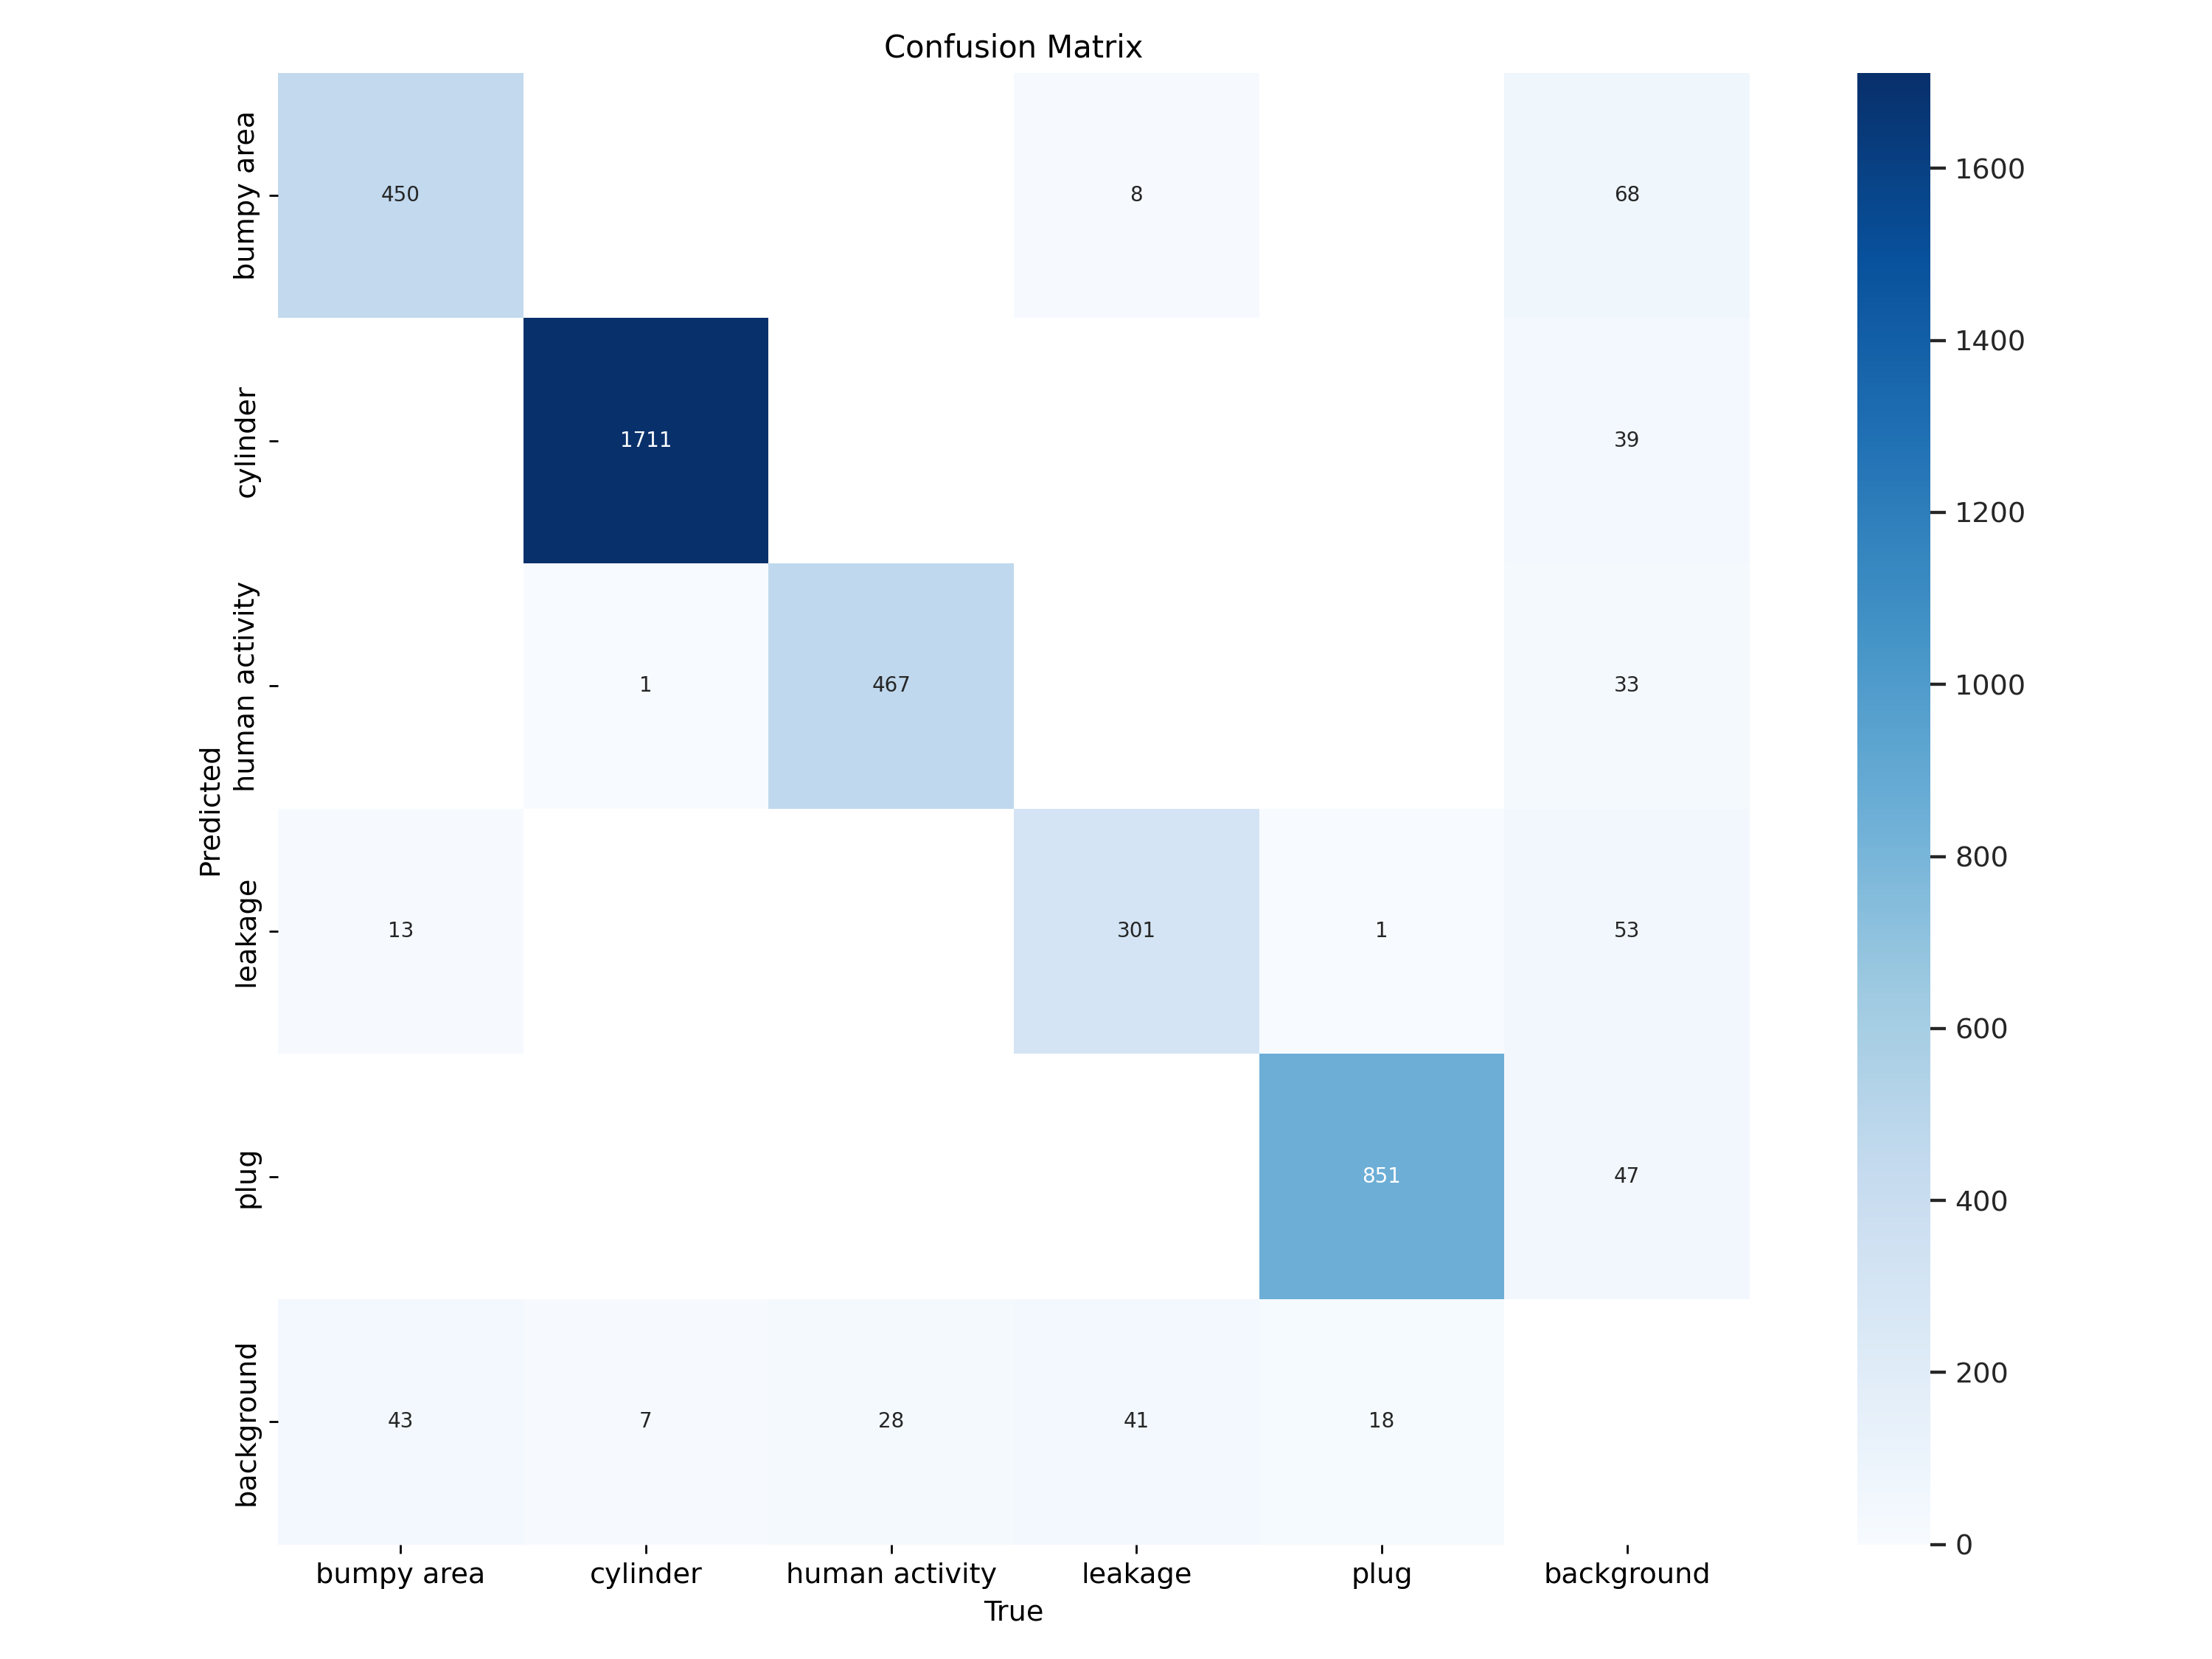

In [ ]:
#used our own model
from IPython.display import Image as IPyImage

IPyImage('/content/drive/MyDrive/runs/detect/train/confusion_matrix.png', width=600)

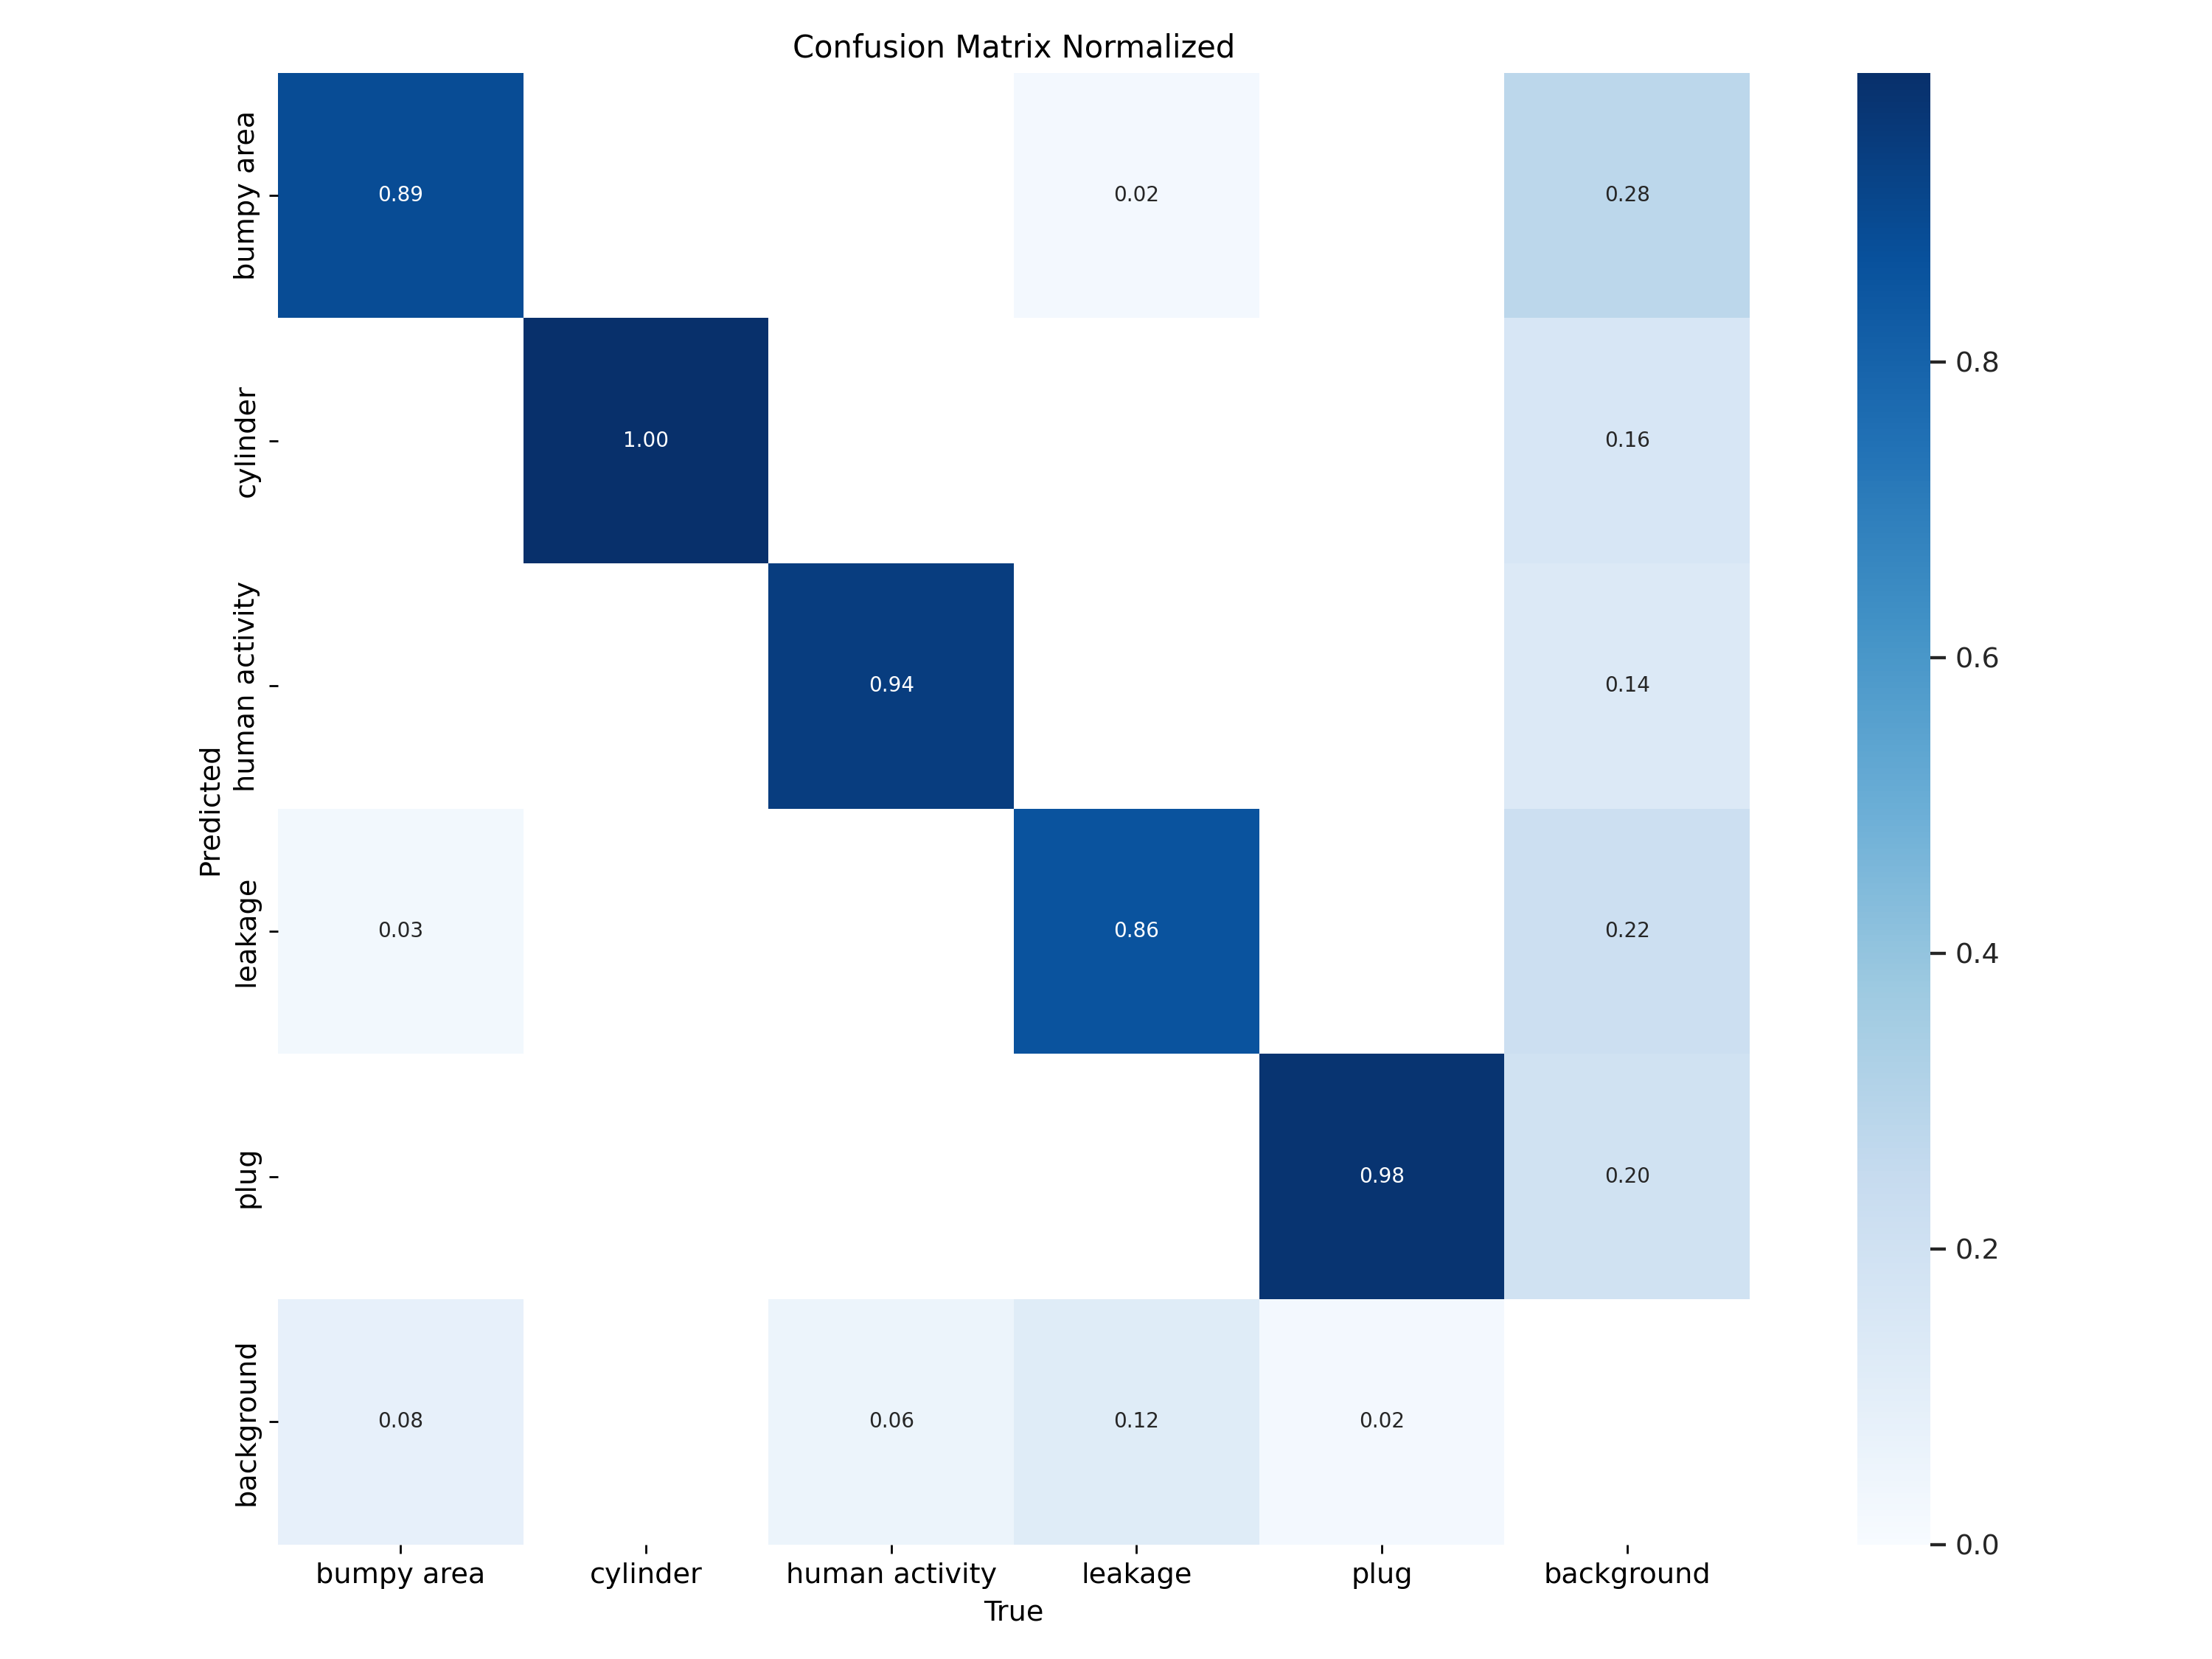

In [ ]:
from IPython.display import Image as IPyImage

IPyImage('/content/drive/MyDrive/runs/detect/train/confusion_matrix_normalized.png', width=600)

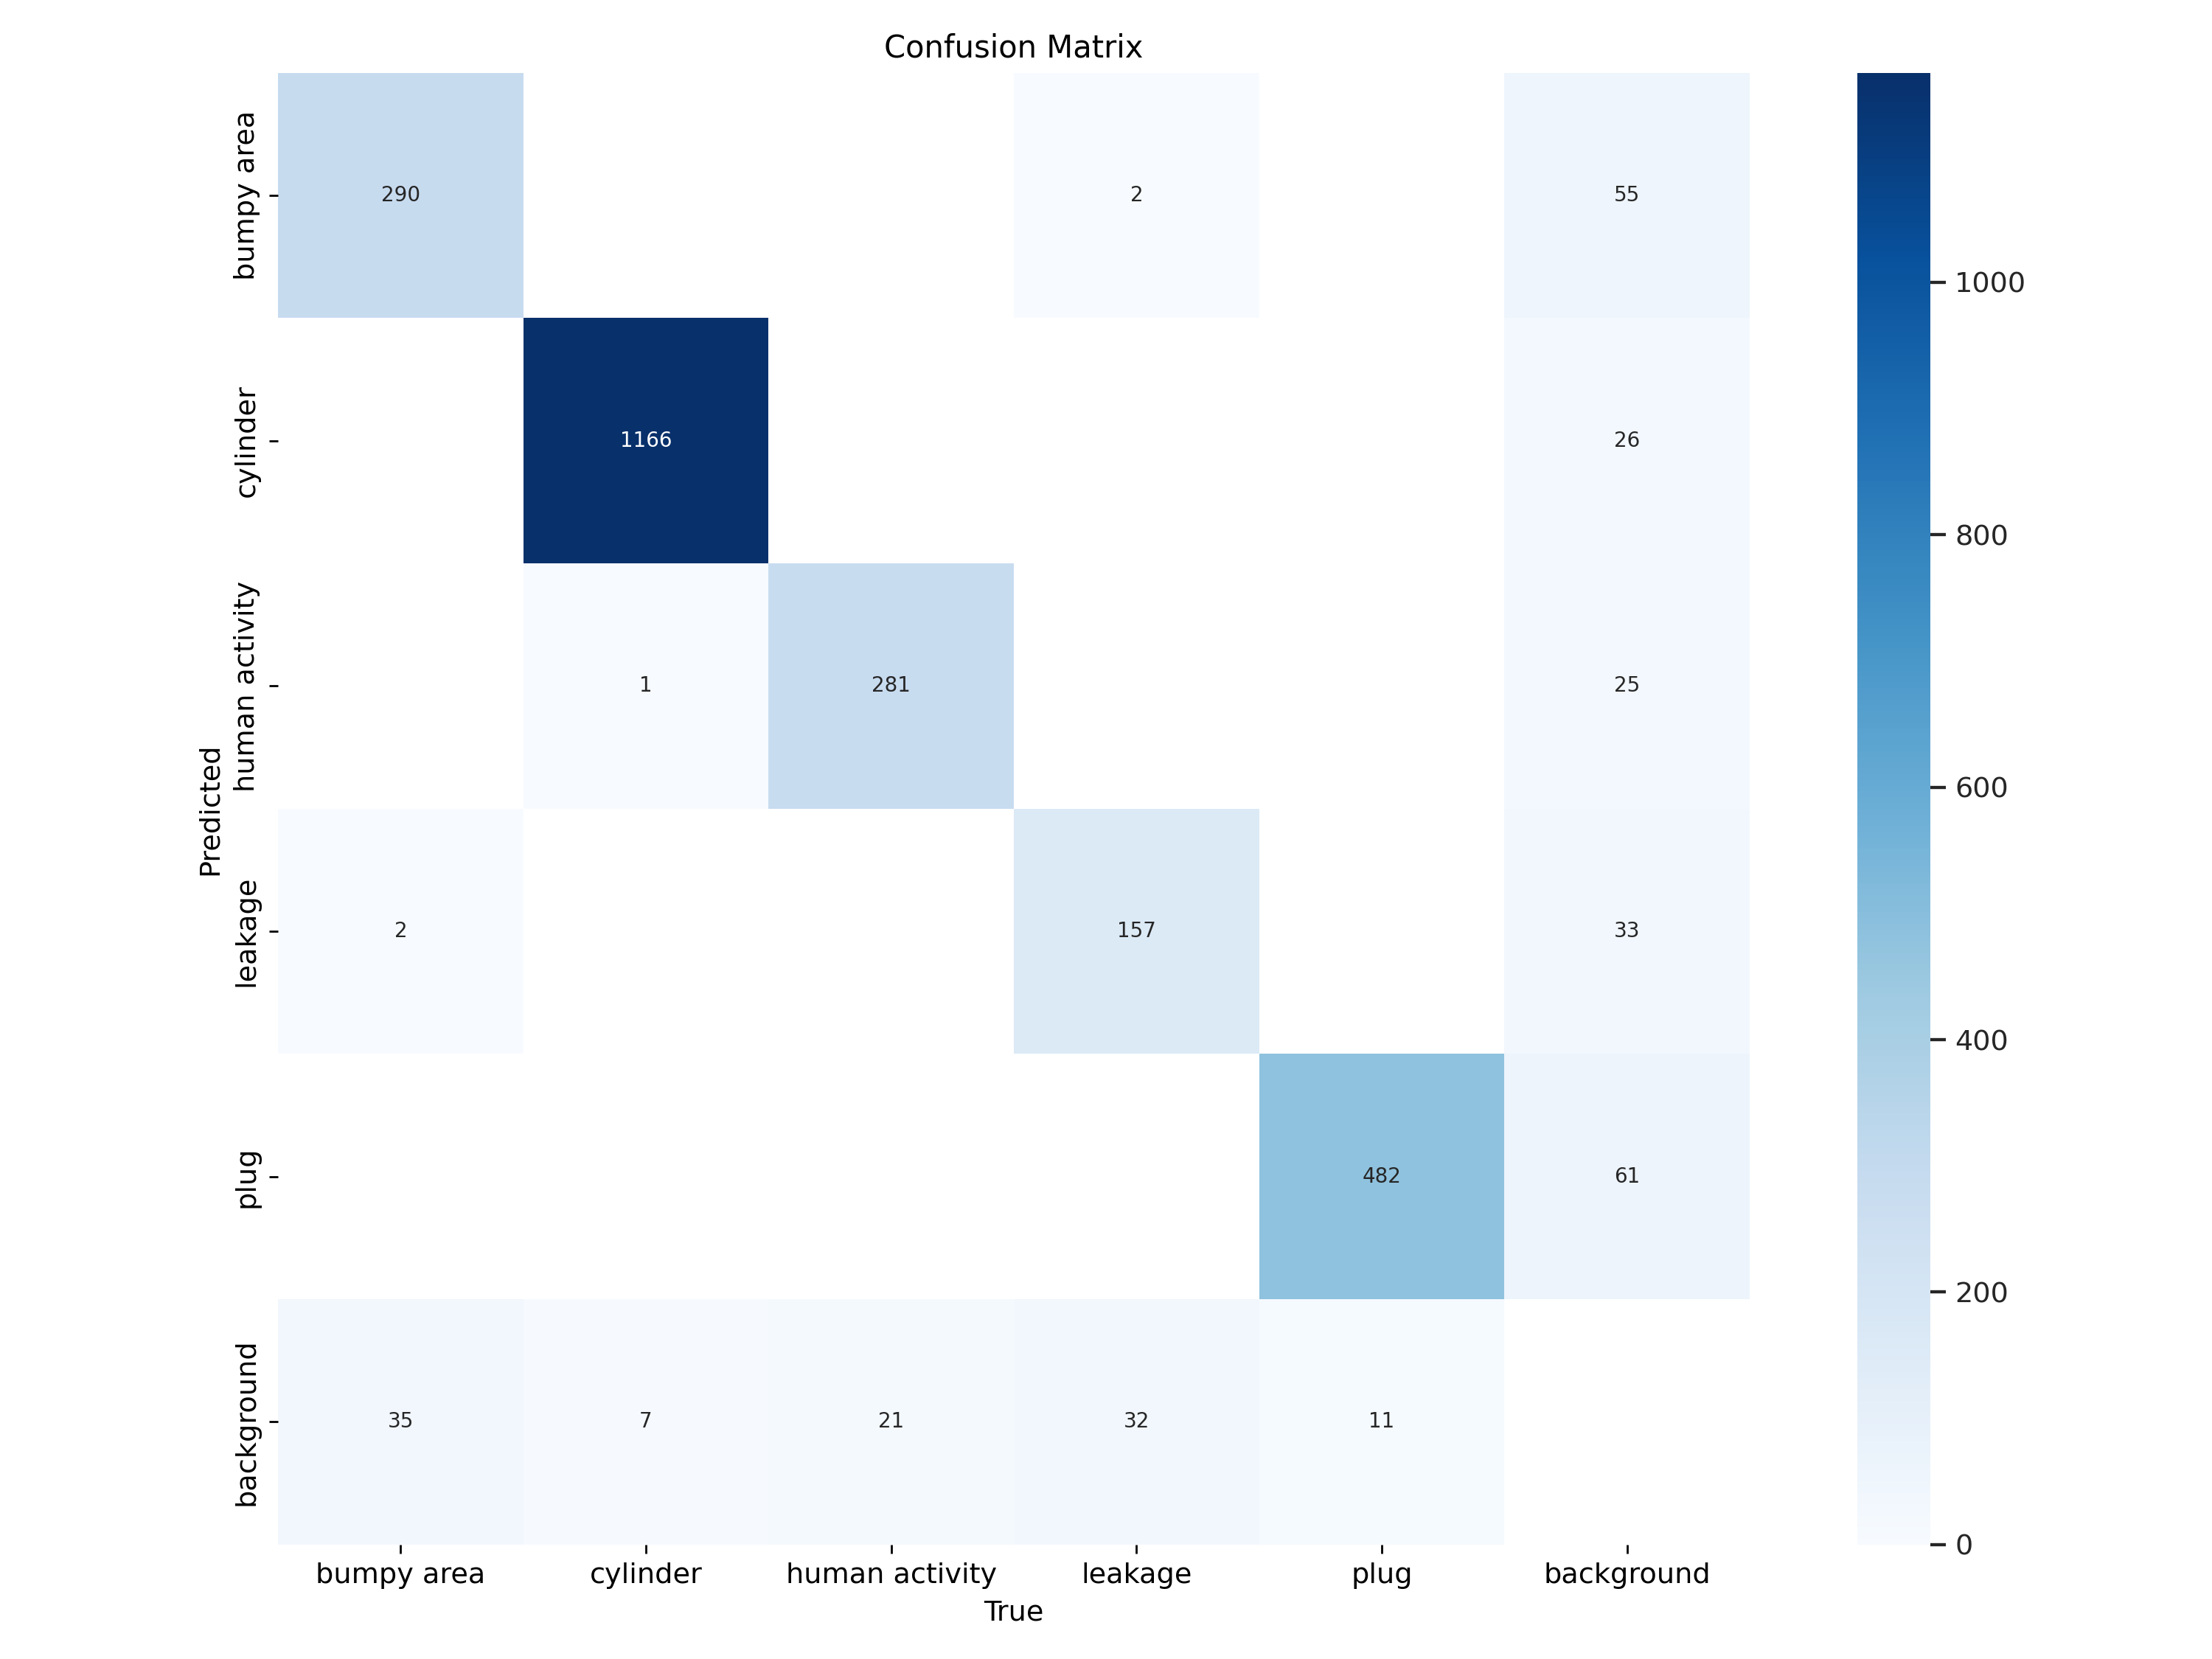

In [ ]:
#used yolo11 pretrained model
from IPython.display import Image as IPyImage

IPyImage('/content/drive/MyDrive/runs/detect/train/confusion_matrix.png', width=600)

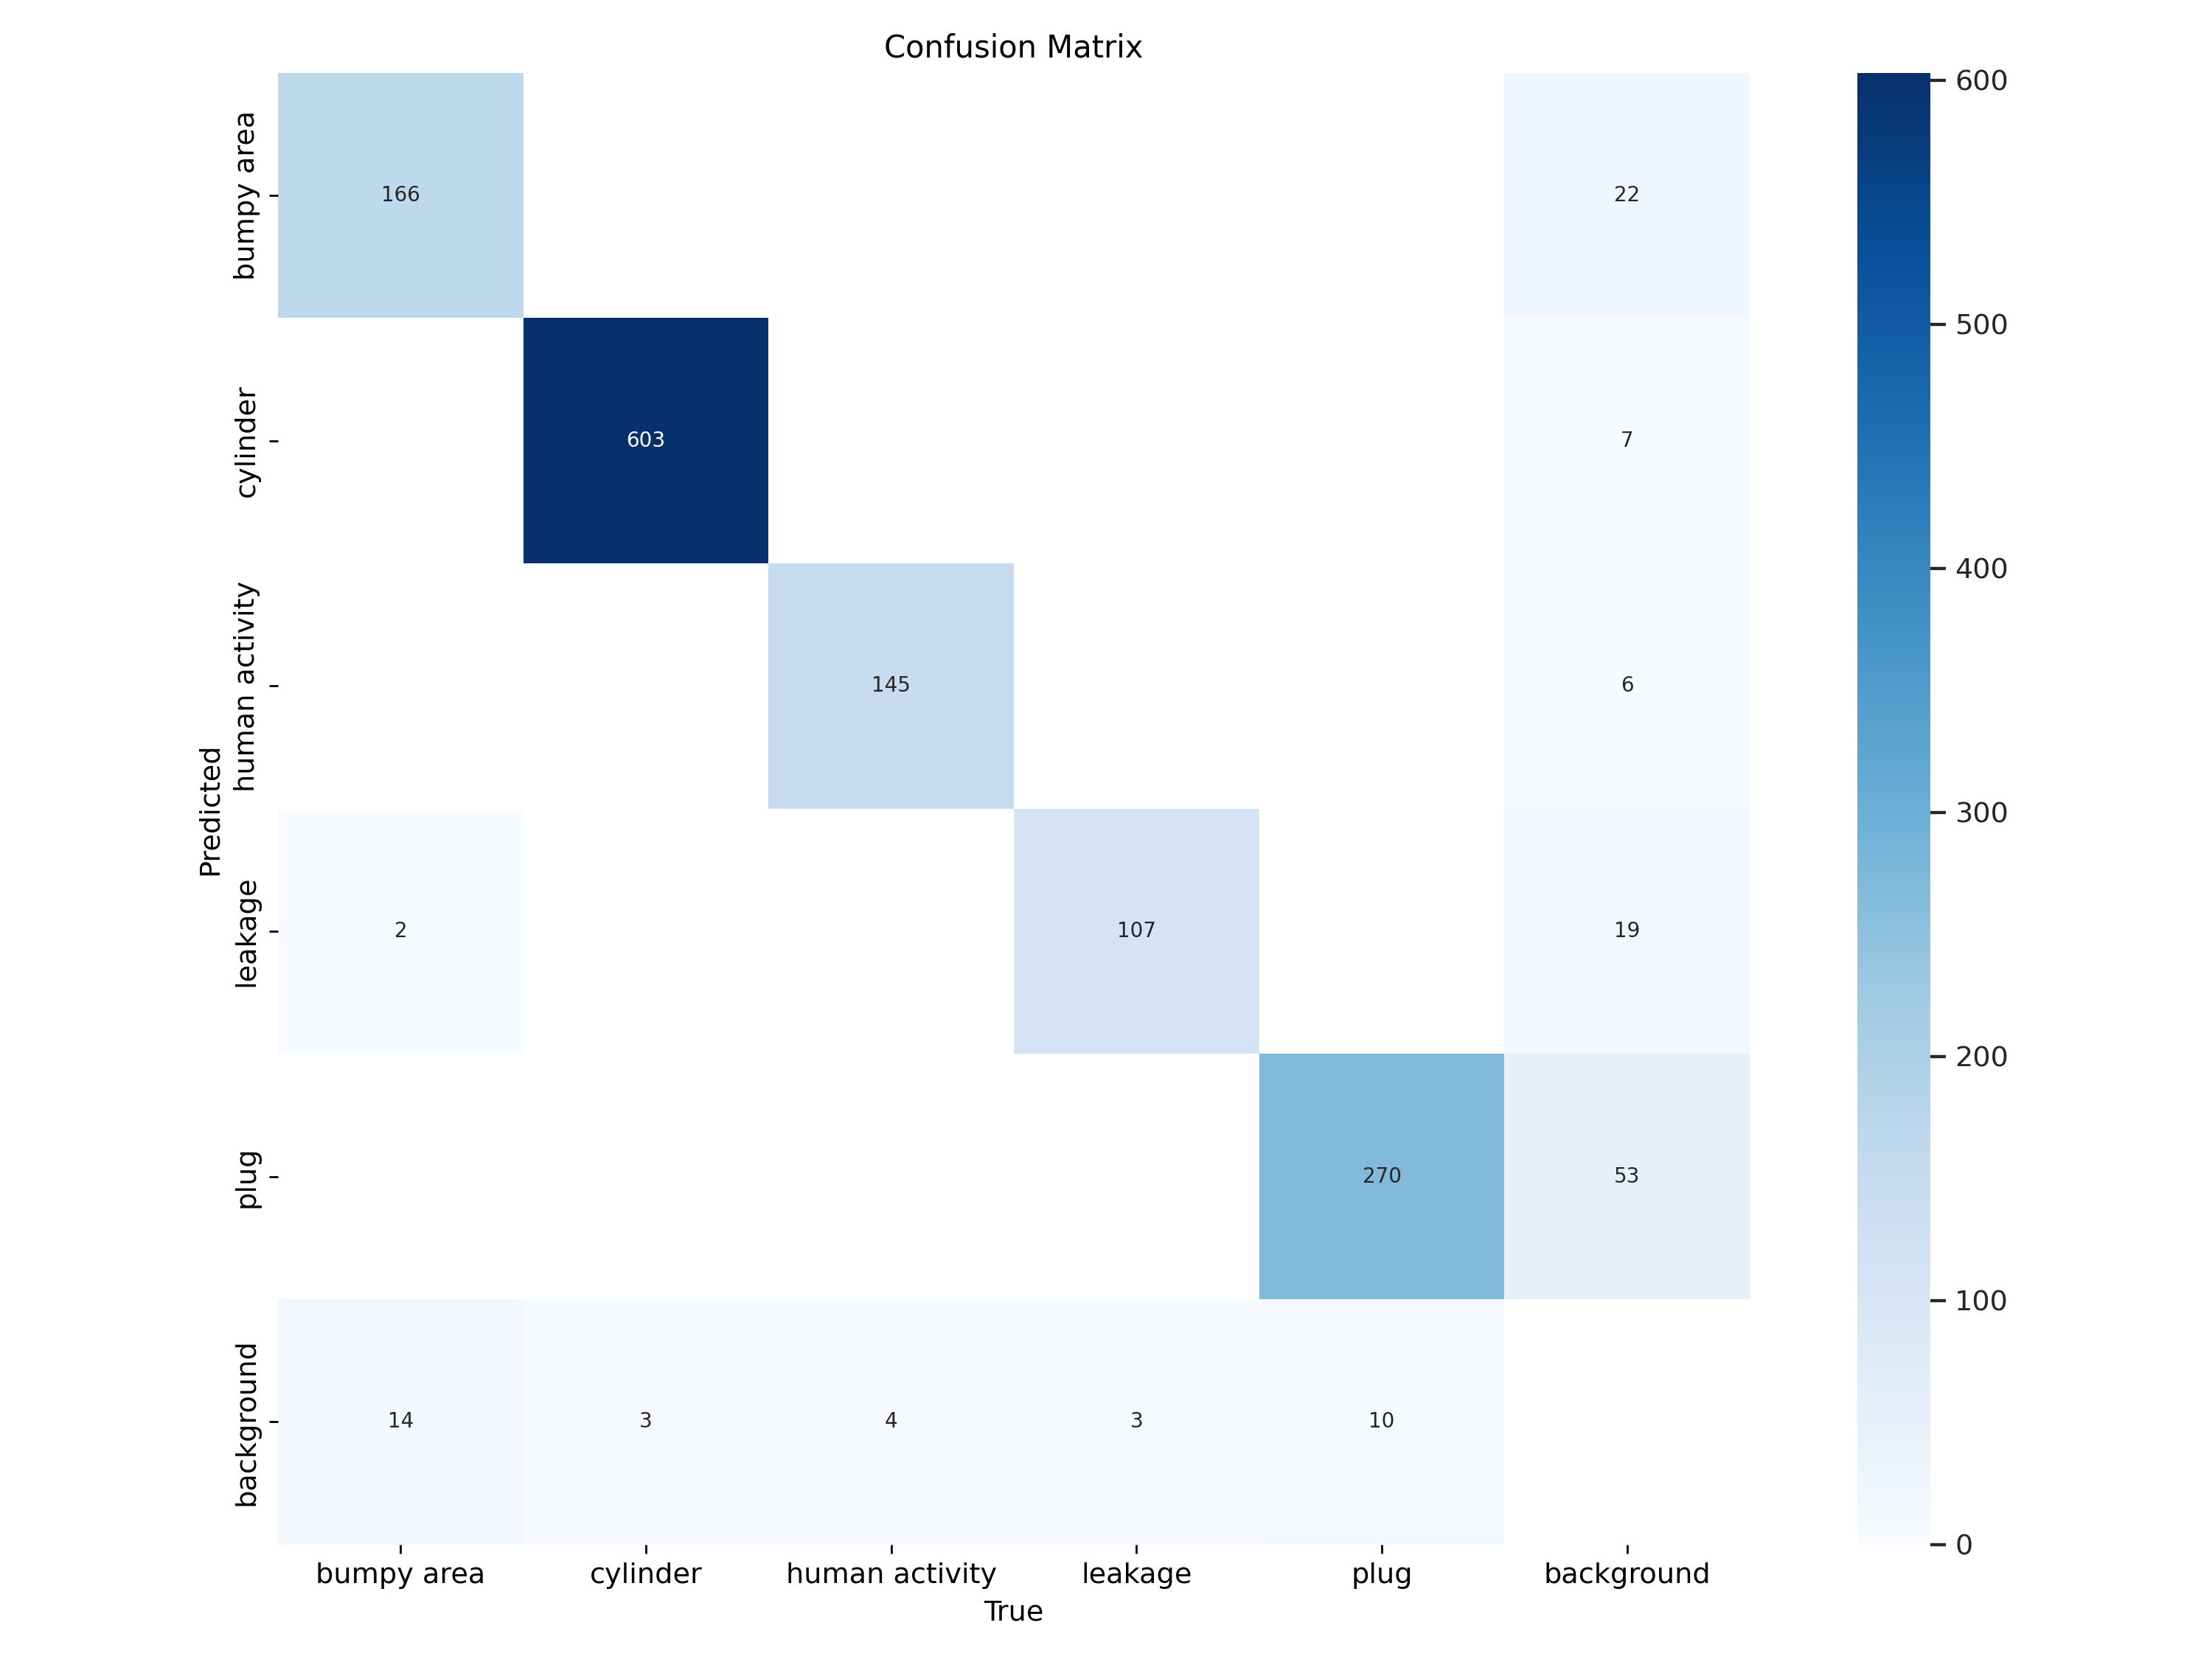

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

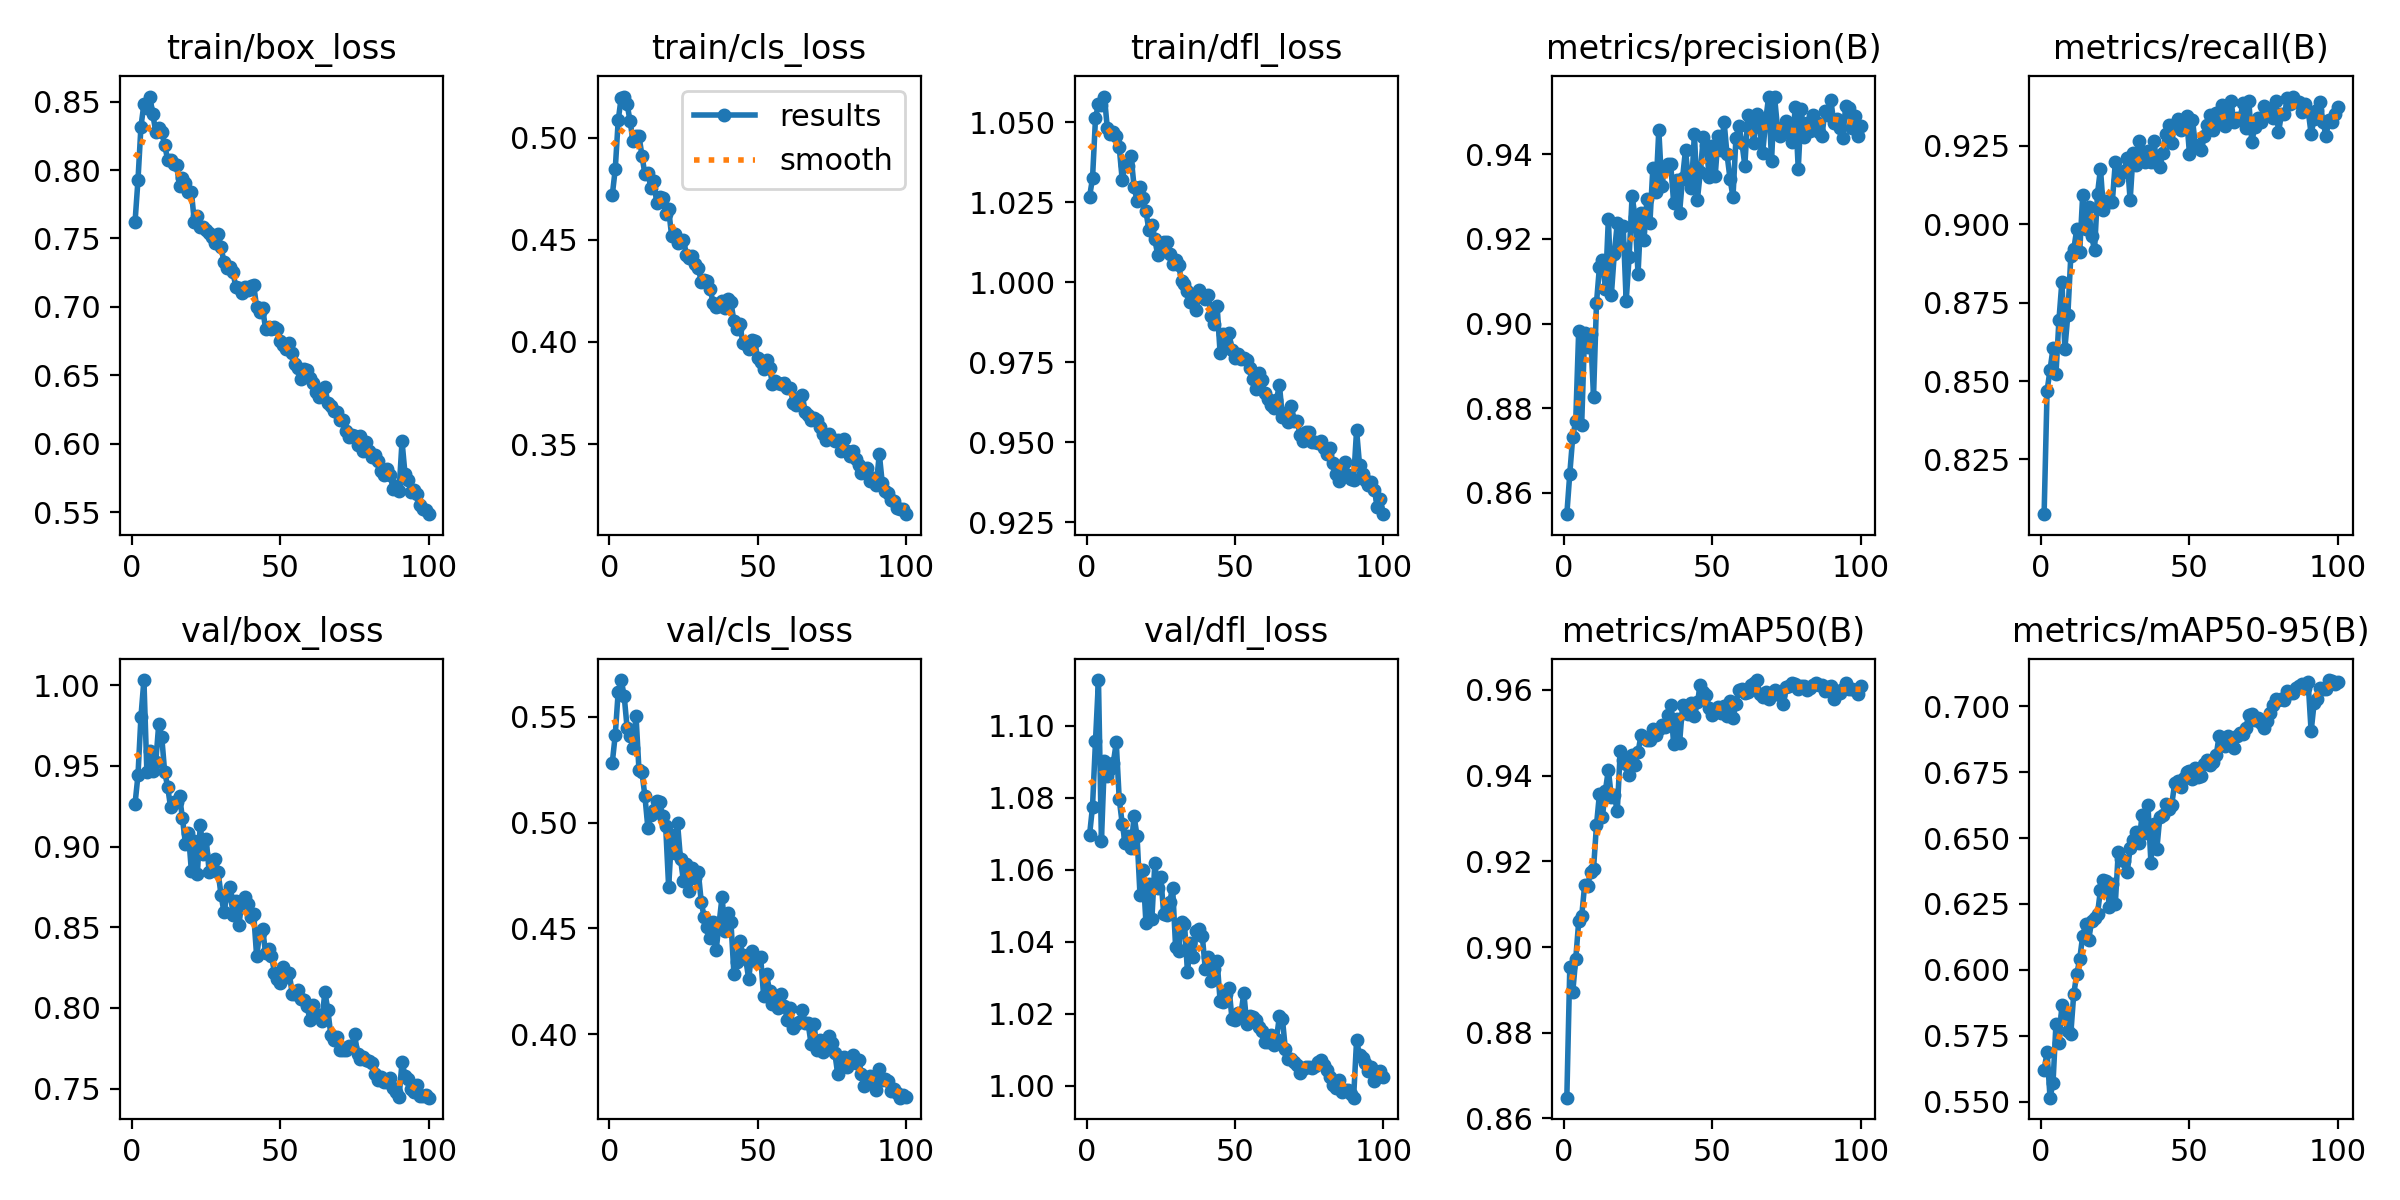

In [ ]:
#used our own pretrianed weights
from IPython.display import Image as IPyImage

IPyImage('/content/drive/MyDrive/runs/detect/train/results.png', width=600)

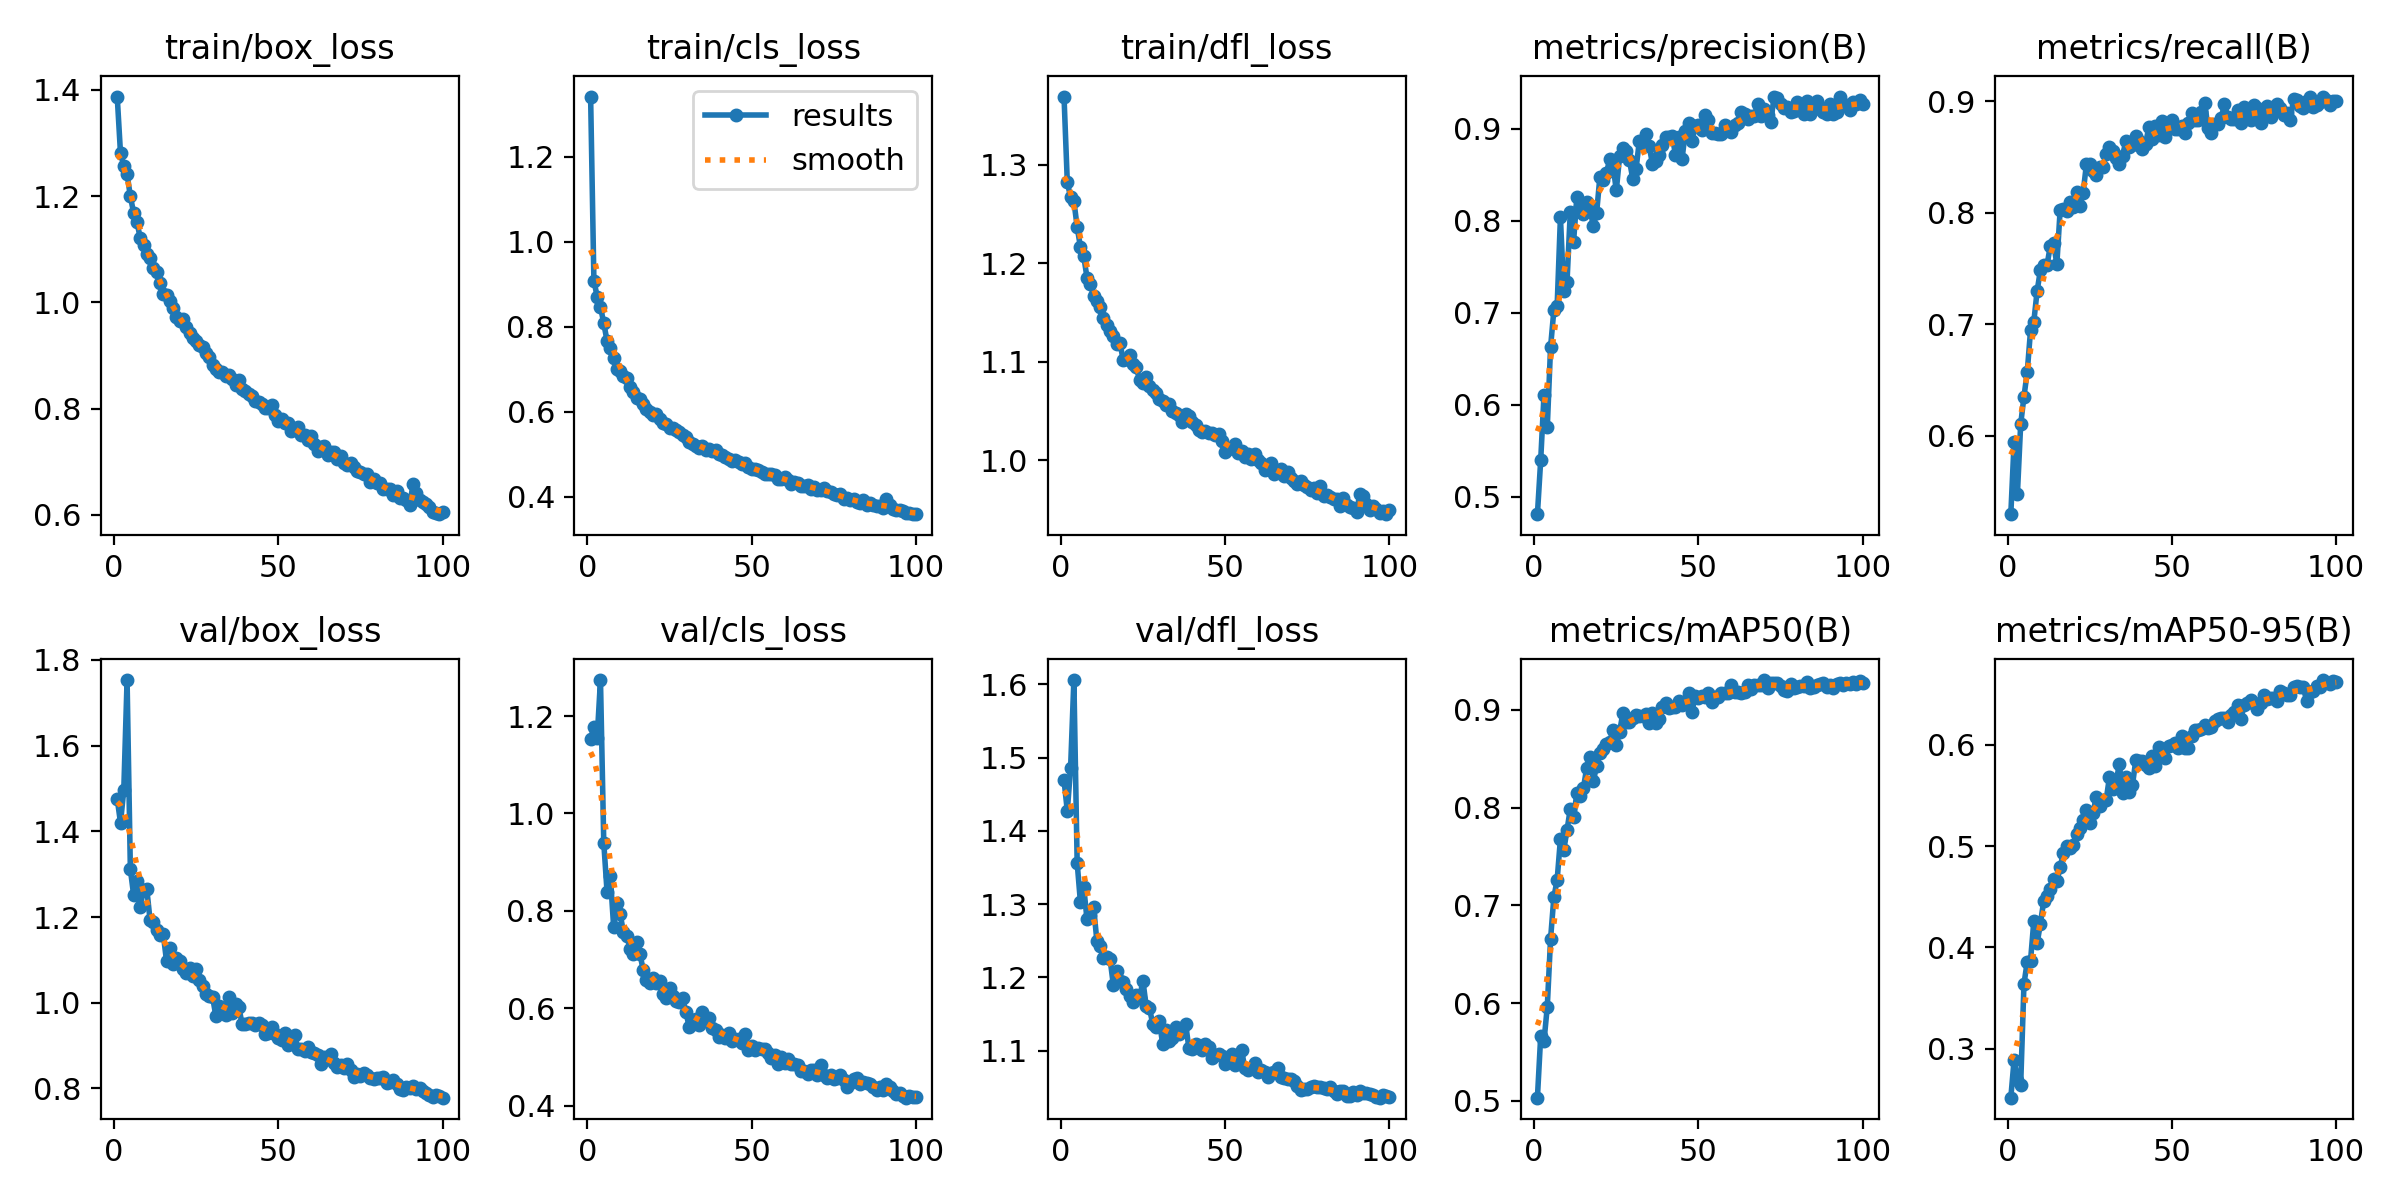

In [ ]:
from IPython.display import Image as IPyImage

IPyImage('/content/drive/MyDrive/runs/detect/train/results.png', width=600)

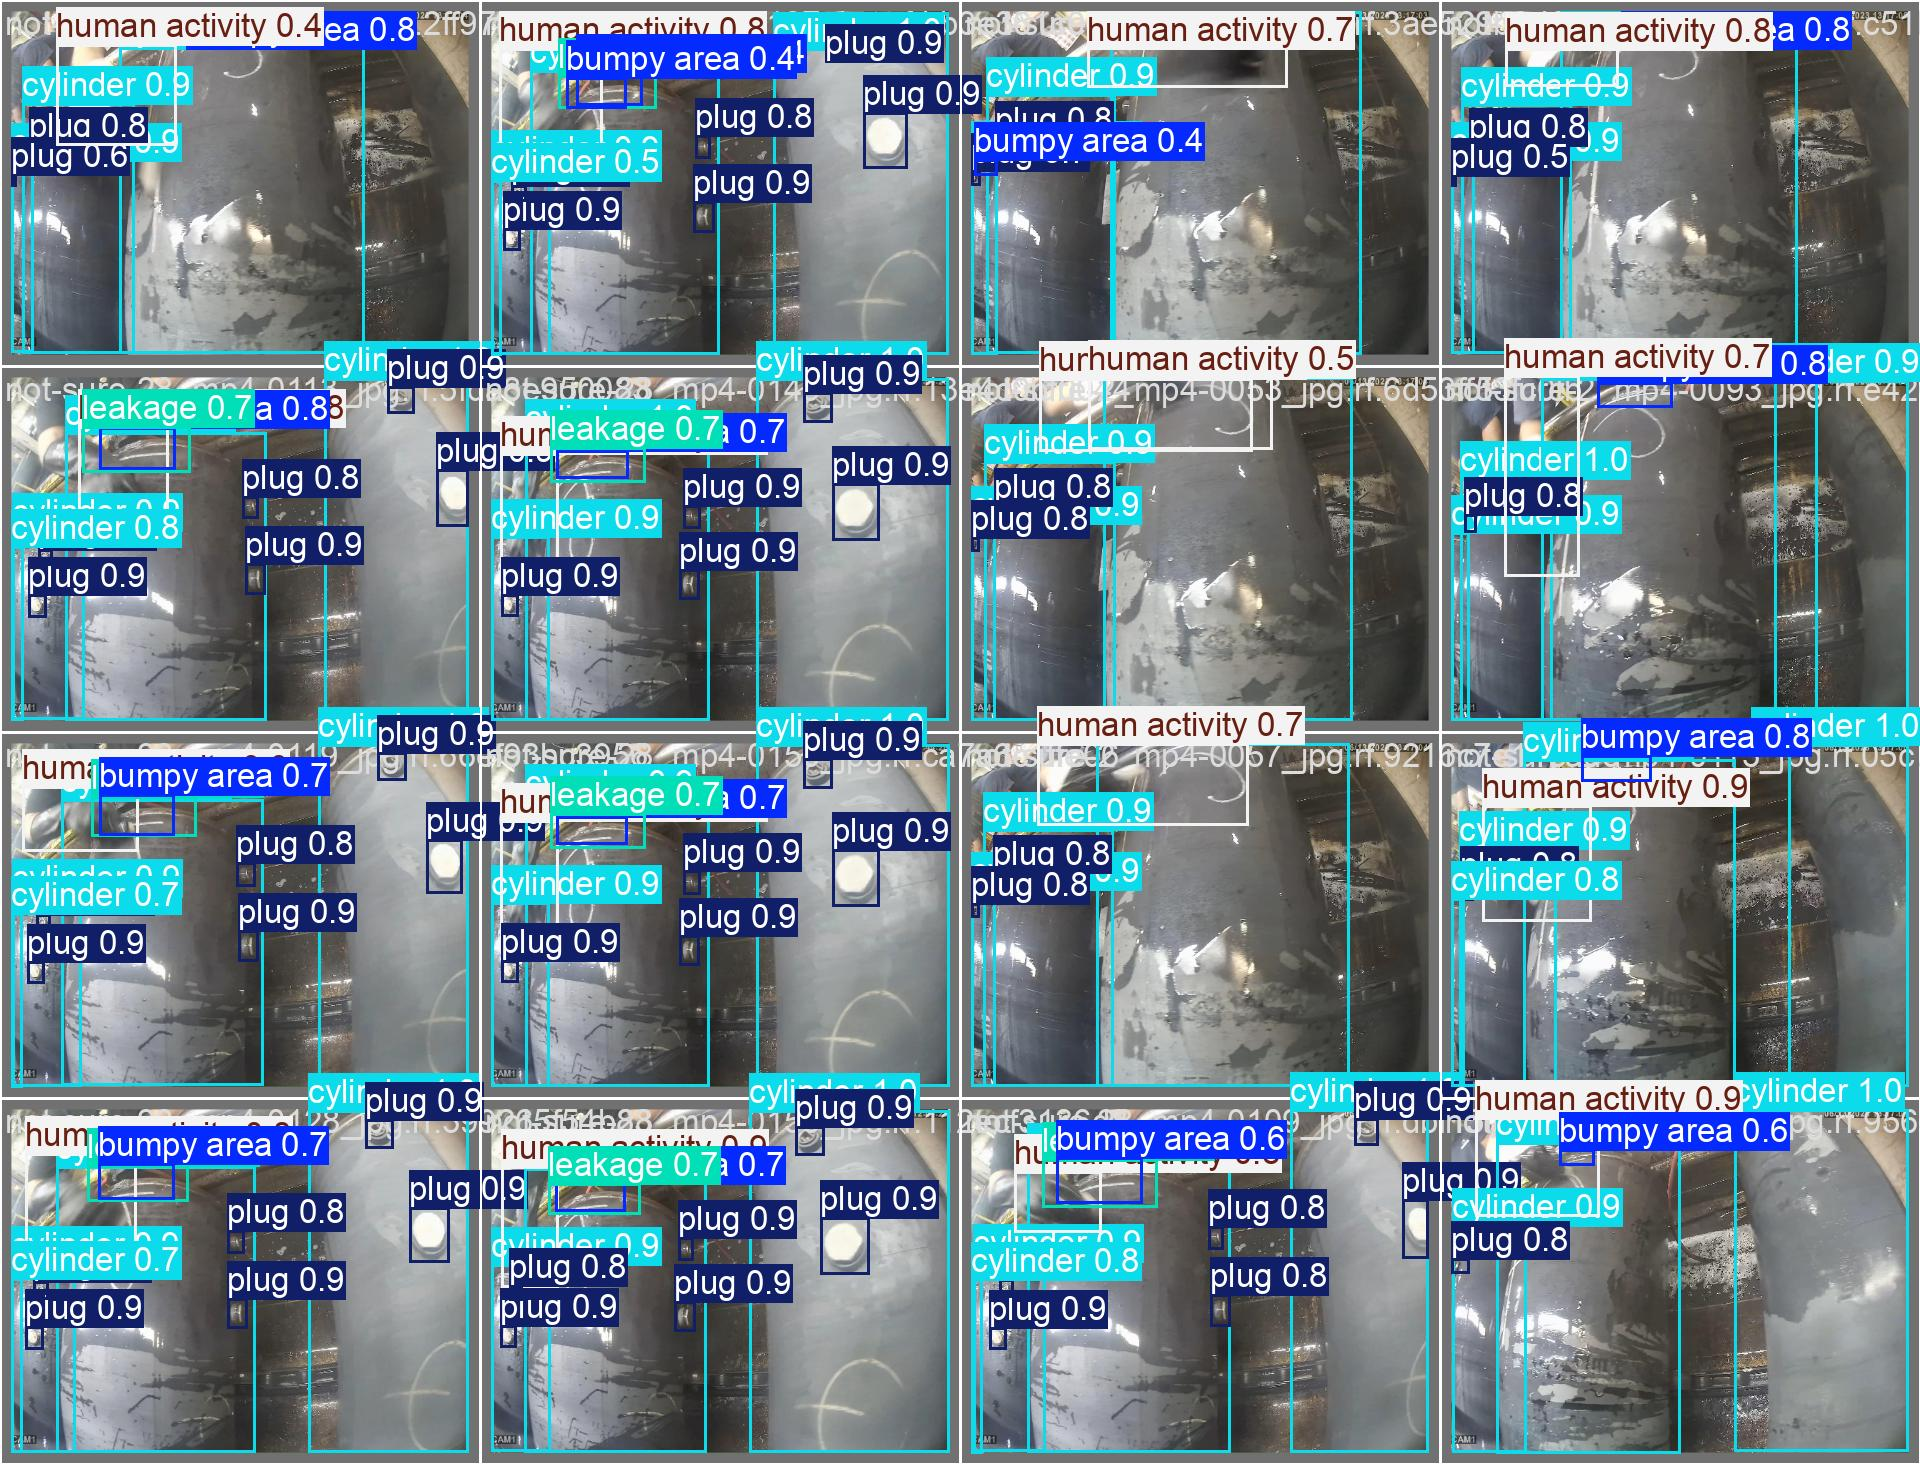

In [ ]:
#our own
from IPython.display import Image as IPyImage

IPyImage('/content/drive/MyDrive/runs/detect/train/val_batch0_pred.jpg', width=600)

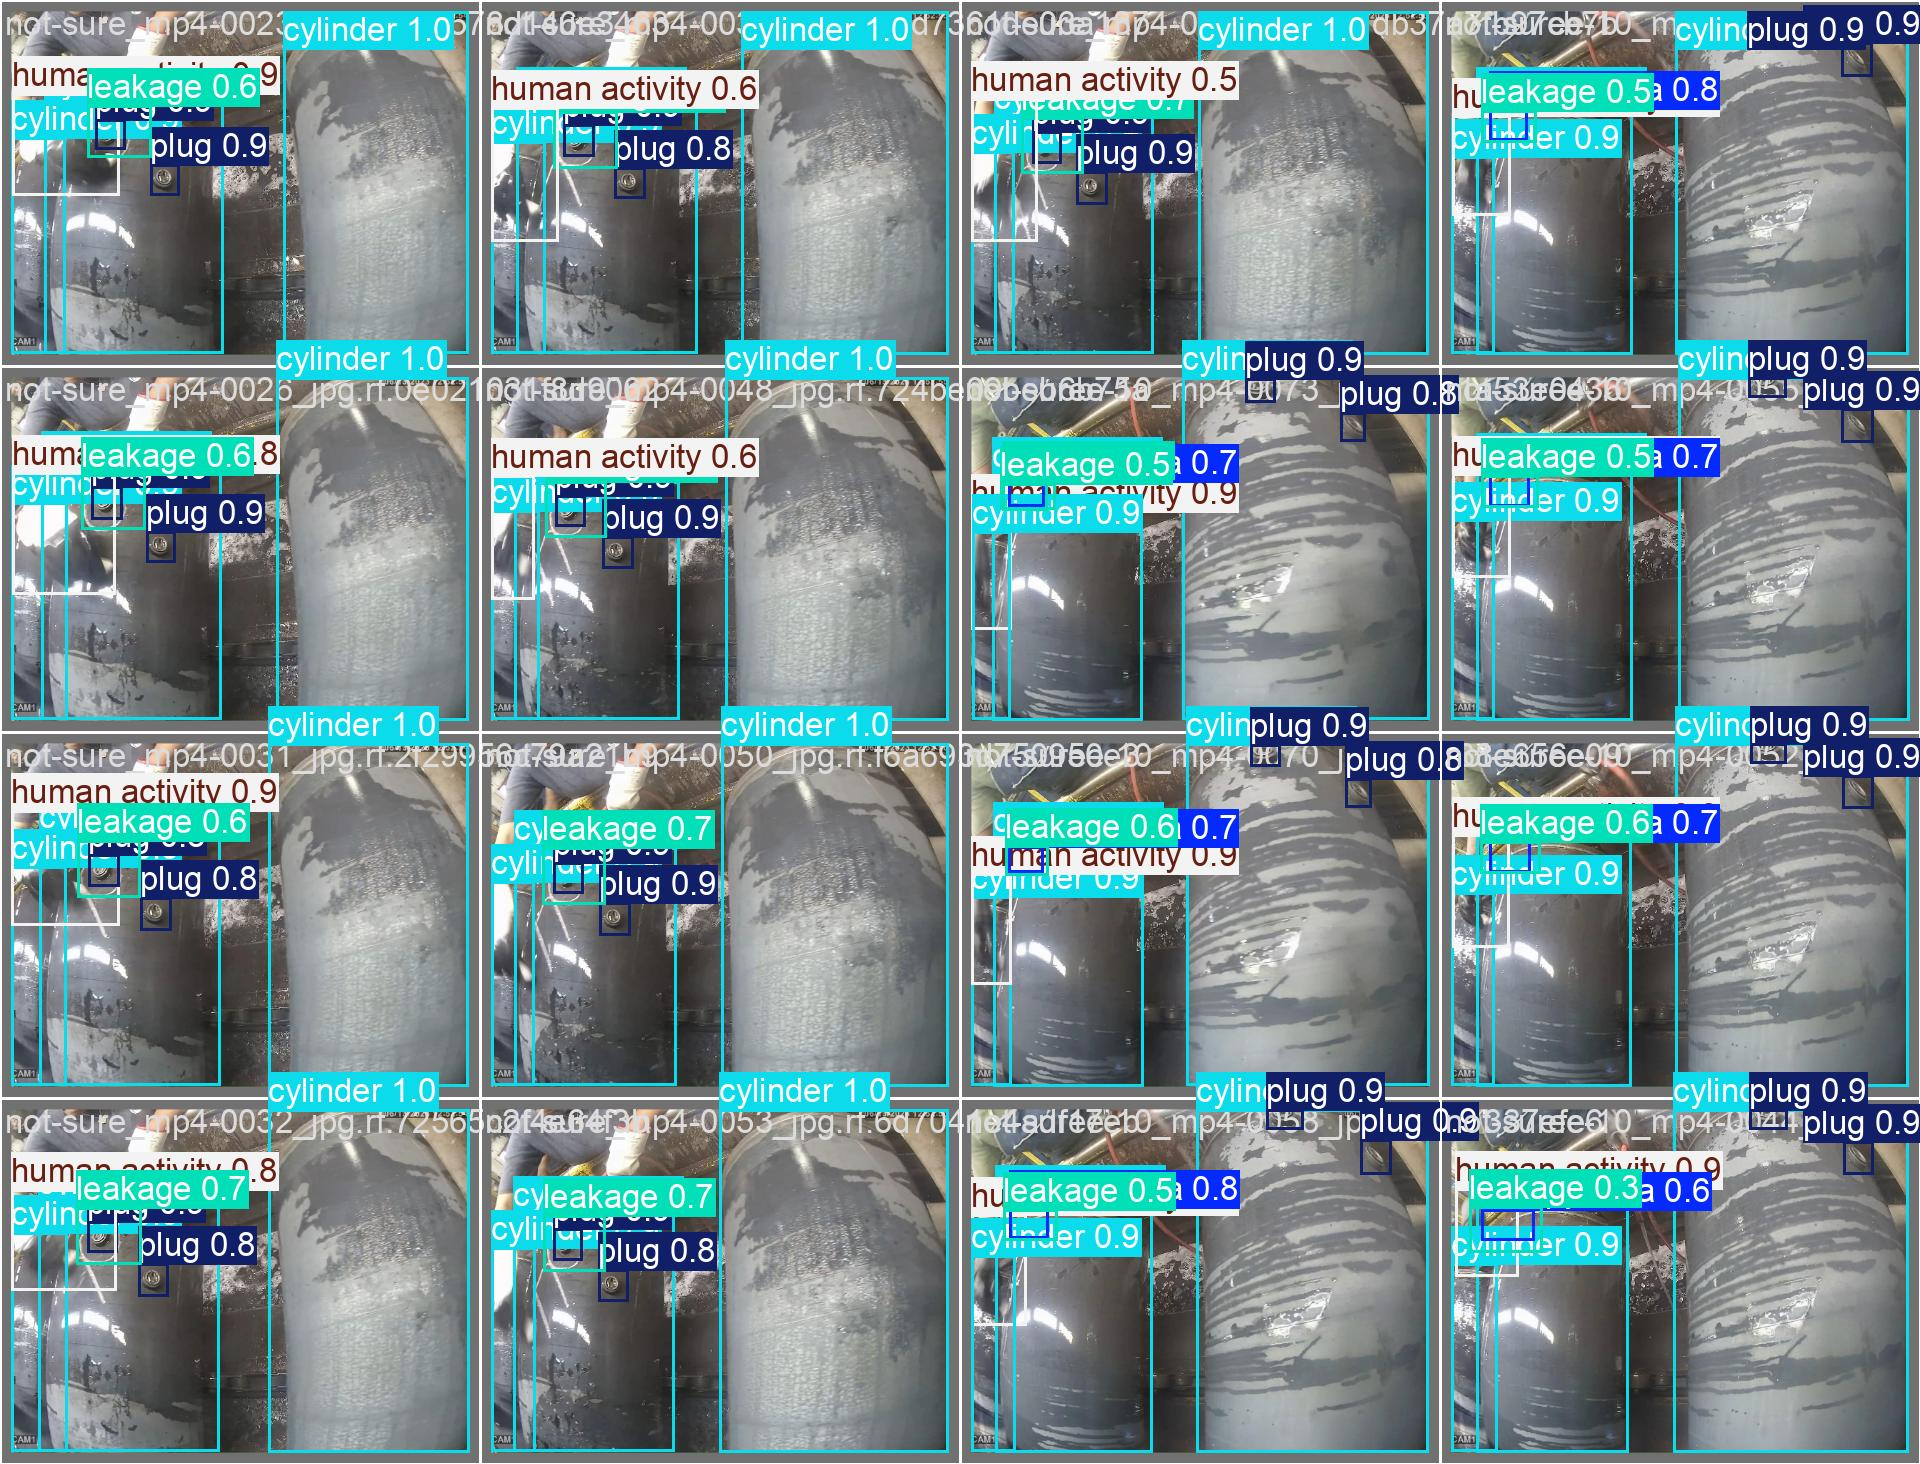

In [ ]:
from IPython.display import Image as IPyImage

IPyImage('/content/drive/MyDrive/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
#our own
!yolo task=detect mode=val model=!yolo task=detect mode=val model=/content/drive/MyDrive/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/drive/MyDrive/GasLeakage-6/valid/labels.cache... 643 images, 0 backgrounds, 0 corrupt: 100% 643/643 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 41/41 [00:21<00:00,  1.92it/s]
                   all        643       3940      0.946      0.932       0.96       0.71
            bumpy area        448        506       0.92      0.905       0.93       0.61
              cylinder        643       1719      0.985      0.991      0.994      0.942
        human activity        495        495      0.938      0.919      0.968      0.705
               leakage        343        350      0.925      0.894      0.926      0.585
                  plug        397        870      0.961      0.951      0.981      0.709
Speed: 0.6ms preprocess, 7.6ms inf

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/drive/MyDrive/GasLeakage-5/valid/labels.cache... 435 images, 0 backgrounds, 0 corrupt: 100% 435/435 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 28/28 [00:12<00:00,  2.28it/s]
                   all        435       2487       0.92      0.905      0.927      0.662
            bumpy area        293        327        0.9      0.851      0.887      0.548
              cylinder        435       1174      0.985      0.992      0.994      0.922
        human activity        302        302       0.93      0.923      0.959      0.706
               leakage        185        191      0.885      0.806       0.83      0.492
                  plug        240        493        0.9      0.951      0.963      0.644
Speed: 1.3ms preprocess, 8.4ms inf

In [ ]:
!yolo task=detect mode=val model=/media/fezan/data_2/sana/runs/detect/train/weights/best.pt data=/media/fezan/data_2/sana/datasets/GasLeakage-2/data.yaml


Ultralytics 8.3.4 🚀 Python-3.9.19 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11009MiB)
YOLO11s summary (fused): 238 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /media/fezan/data_2/sana/datasets/GasLeakage-2/valid/labels... 584
val: New cache created: /media/fezan/data_2/sana/datasets/GasLeakage-2/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        584       3049      0.921      0.843      0.892      0.678
            bumpy area        427        485      0.877      0.804       0.88      0.632
              cylinder        571       1421      0.977      0.982      0.993      0.918
        human activity        282        282      0.977      0.765      0.864      0.745
               leakage        206        217      0.856      0.737      0.783      0.474
                  plug        265        644      0.916      0.926      0.942      0.619
Speed: 0.3ms preprocess, 3.6ms i

## Inference with custom model

In [ ]:
#our own
!yolo task=detect mode=predict model=/content/drive/MyDrive/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs

image 1/643 /content/drive/MyDrive/GasLeakage-6/test/images/20240528090727-I-_mp4-0000_jpg.rf.bb203b828786b476d48e524e5edde727.jpg: 640x640 2 cylinders, 1 plug, 18.3ms
image 2/643 /content/drive/MyDrive/GasLeakage-6/test/images/20240528090727-I-_mp4-0841_jpg.rf.956e8941c6f134d71a5a44785c4c9f5f.jpg: 640x640 3 cylinders, 1 human activity, 1 leakage, 15.7ms
image 3/643 /content/drive/MyDrive/GasLeakage-6/test/images/20240528090727-I-_mp4-0843_jpg.rf.61e7698817d255ff0cf590c4811ac967.jpg: 640x640 3 cylinders, 1 human activity, 1 leakage, 15.7ms
image 4/643 /content/drive/MyDrive/GasLeakage-6/test/images/20240528090727-I-_mp4-0850_jpg.rf.2eed6b6b6af15c20b2905cde0b8e615f.jpg: 640x640 3 cylinders, 1 human activity, 1 leakage, 15.7ms
image 5/643 /content/drive/MyDrive/GasLeakage-6/test/images/20240528090727-I-_mp4-0854_jpg.rf.3722

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs

image 1/456 /content/drive/MyDrive/GasLeakage-5/test/images/20240528090727-I-_mp4-0000_jpg.rf.bb203b828786b476d48e524e5edde727.jpg: 640x640 2 cylinders, 1 plug, 15.7ms
image 2/456 /content/drive/MyDrive/GasLeakage-5/test/images/20240528090727-I-_mp4-0841_jpg.rf.956e8941c6f134d71a5a44785c4c9f5f.jpg: 640x640 3 cylinders, 2 human activitys, 15.6ms
image 3/456 /content/drive/MyDrive/GasLeakage-5/test/images/20240528090727-I-_mp4-0850_jpg.rf.2eed6b6b6af15c20b2905cde0b8e615f.jpg: 640x640 3 cylinders, 1 human activity, 1 leakage, 15.6ms
image 4/456 /content/drive/MyDrive/GasLeakage-5/test/images/20240528090727-I-_mp4-0854_jpg.rf.3722365cc3c802a555e5040f7bf200fb.jpg: 640x640 3 cylinders, 2 human activitys, 1 leakage, 15.5ms
image 5/456 /content/drive/MyDrive/GasLeakage-5/test/images/20240528090727-I-_mp4-0875_jpg.rf.728d77bd8728f

In [ ]:
!yolo task=detect mode=predict model=/media/fezan/data_2/sana/runs/detect/train/weights/best.pt data=/media/fezan/data_2/sana/datasets/GasLeakage-2/data.yaml source=./20240516063647.mp4

Ultralytics 8.3.4 🚀 Python-3.9.19 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11009MiB)
YOLO11s summary (fused): 238 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs

video 1/1 (frame 1/1983) /media/fezan/data_2/sana/20240516063647.mp4: 480x640 1 cylinder, 2 plugs, 26.0ms
video 1/1 (frame 2/1983) /media/fezan/data_2/sana/20240516063647.mp4: 480x640 2 cylinders, 2 plugs, 6.0ms
video 1/1 (frame 3/1983) /media/fezan/data_2/sana/20240516063647.mp4: 480x640 2 cylinders, 2 plugs, 6.6ms
video 1/1 (frame 4/1983) /media/fezan/data_2/sana/20240516063647.mp4: 480x640 2 cylinders, 2 plugs, 5.9ms
video 1/1 (frame 5/1983) /media/fezan/data_2/sana/20240516063647.mp4: 480x640 2 cylinders, 2 plugs, 5.9ms
video 1/1 (frame 6/1983) /media/fezan/data_2/sana/20240516063647.mp4: 480x640 2 cylinders, 2 plugs, 6.3ms
video 1/1 (frame 7/1983) /media/fezan/data_2/sana/20240516063647.mp4: 480x640 1 cylinder, 1 plug, 5.9ms
video 1/1 (frame 8/1983) /media/fezan/data_2/sana/20240516063647.mp4: 480x640

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

ValueError: max() arg is an empty sequence

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.